# 参考https://zhuanlan.zhihu.com/p/266994943

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from WindPy import w
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2020 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [2]:
def stock_data(stockList, fields, startDate, endDate):
    data = w.wsd(stockList, fields, startDate, endDate, "")
    df = pd.DataFrame(data.Data, columns = data.Times, index = data.Fields).T
    return df

In [3]:
stockList = ["000300.SH"]
fields = ["Close"]
startDate = "20060101"
endDate = "20210101"
N = 1 # N-month return of index

In [4]:
df = stock_data(stockList, fields, startDate, endDate)

In [5]:
df

,CLOSE
2006-01-04,941.4280
2006-01-05,959.1340
2006-01-06,970.0320
2006-01-09,975.2530
2006-01-10,978.1540
...,...
2020-12-25,5042.0137
2020-12-28,5064.4147
2020-12-29,5042.9361
2020-12-30,5113.7105


In [6]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [7]:
bound1_split = round(len(df)*0.70)
bound2_split = round(len(df)*0.85)
train_data = scaled_data[:bound2_split]
# valid_data = scaled_data[bound1_split:bound2_split]
test_data  = scaled_data[bound2_split:]

In [8]:
x_train, y_train = [], []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [9]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [10]:
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

3040/3040 - 32s - loss: 0.0015


In [11]:
x_test = []
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [12]:
closing_price = model.predict(x_test)
closing_price = scaler.inverse_transform(closing_price)

In [13]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

train = df[:bound2_split]
test = df[bound2_split+60:]
test['Predictions'] = closing_price

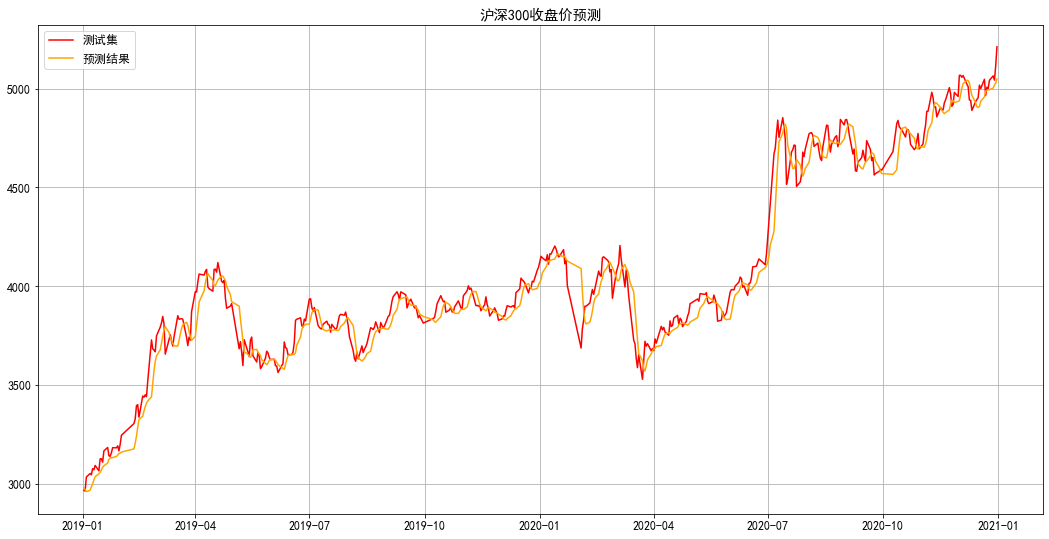

In [14]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rc('font', size=12)
plt.figure(figsize=(18,9))
plt.title("沪深300收盘价预测")
plt.grid()
#plt.plot(train['CLOSE'],color="blue",label="训练集")
plt.plot(test['CLOSE'],color="red",label="测试集")
plt.plot(test['Predictions'],color="orange",label="预测结果")
plt.legend()

In [20]:
from sklearn.datasets import fetch_openml

In [21]:
fetch_openml('mnist_784',version = 1)

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe